# Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
 

# Loading and Cleaning the Data

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

>
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


In [2]:
# Load data as Pandas dataframe
df = pd.read_csv("https://github.com/Sanikap05/DataScience/raw/main/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


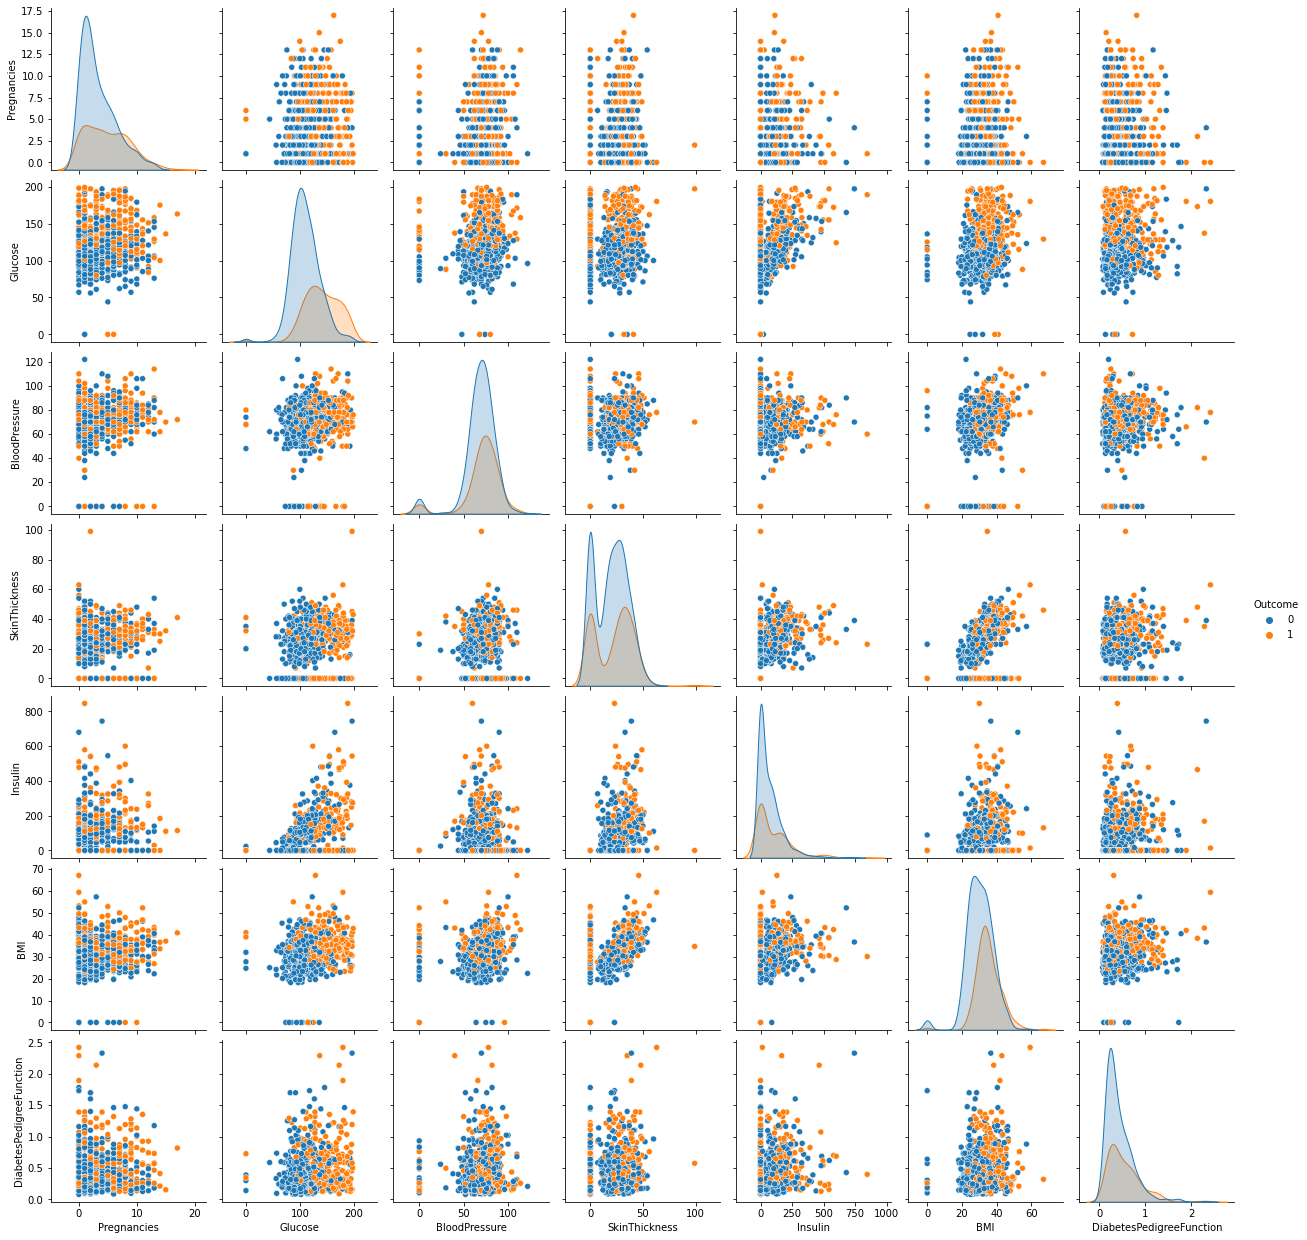

In [4]:
# simple visualization to show how the inputs compare against each other
sns.pairplot( data=df, vars=('Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction'), hue='Outcome' )

In [5]:
#droppping all NAN
df = df.dropna()

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In the machine learning algorithms if the values of the features are closer to each other there are chances for the algorithm to get trained well and faster instead of the data set where the data points or features values have high differences with each other will take more time to understand the data and the accuracy will be lower. 
>
Scaling is used for making data points generalized so that the distance between them will be lower.

In [7]:
#Scaling continous variables
continuous = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','Age','DiabetesPedigreeFunction']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [8]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [9]:
#splitting the data for test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Implementing Logistic Regression using Sigmoid as Activation Function

A Sigmoid function is a mathematical function which has a characteristic S-shaped curve.Sigmoid function is normally used to refer specifically to the logistic function, also called the logistic sigmoid function.
>
The main reason why sigmoid function is used is because it exists between (0 to 1). Therefore, it is especially used for models where there is need to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.
>
The Sigmoid Function curve looks like a S-shape.
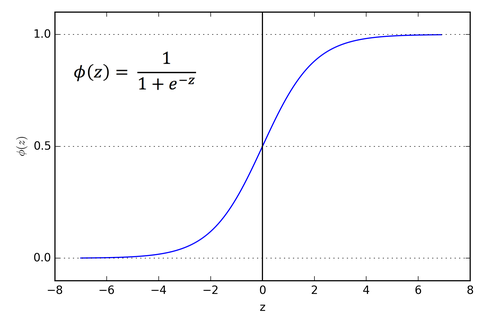

In [10]:
# Sigmoid Function 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
# Cost Function
def J(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [12]:
# Gradient Descent Function
def gradientdescent(X, y, lmd, alpha, num_iter, print_cost):

    # select initial values zero
    theta = np.zeros(X.shape[1])
    
    costs = []  
    
    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        
        # adding regularization 
        reg = lmd / y.size * theta
        # first theta is intercept
        # it is not regularized
        reg[0] = 0
        cost = J(h, y)
        
        gradient = np.dot(X.T, (h - y)) / y.size + reg
        theta = theta - alpha * gradient
    
        if print_cost and i % 100 == 0: 
            print('Number of Iterations: ', i, 'Cost : ', cost, 'Theta: ', theta)
        if i % 100 == 0:
            costs.append(cost)
      
    return theta, costs

In [13]:
# Predict Function 
def predict_sig(X_test, theta):
    z = np.dot(X_test, theta)
    return sigmoid(z)

In [14]:
# Main Logistic Function
def logistic_sig(X_train, y_train, X_test, lmd=0, alpha=0.1, num_iter=30000, print_cost = False):
    # Adding intercept
    intercept = np.ones((X_train.shape[0], 1))
    X_train = np.concatenate((intercept, X_train), axis=1)
    
    intercept = np.ones((X_test.shape[0], 1))
    X_test = np.concatenate((intercept, X_test), axis=1)

    # one vs rest
    u=set(y_train)
    t=[]
    allCosts=[]   
    for c in u:
        # set the labels to 0 and 1
        ynew = np.array(y_train == c, dtype = int)
        theta_onevsrest, costs_onevsrest = gradientdescent(X_train, ynew, lmd, alpha, num_iter, print_cost)
        t.append(theta_onevsrest)
        
        # Save costs
        allCosts.append(costs_onevsrest)
        
    # Calculate probabilties
    pred_test = np.zeros((len(u),len(X_test)))
    for i in range(len(u)):
        pred_test[i,:] = predict_sig(X_test,t[i])
    
    # Select max probability
    prediction_test = np.argmax(pred_test, axis=0)
    
    # Calculate probabilties
    pred_train = np.zeros((len(u),len(X_train)))
    for i in range(len(u)):
        pred_train[i,:] = predict_sig(X_train,t[i])
    
    # Select max probability
    prediction_train = np.argmax(pred_train, axis=0)
    
    d = {"costs": allCosts,
         "Y_prediction_test": prediction_test, 
         "Y_prediction_train" : prediction_train, 
         "learning_rate" : alpha,
         "num_iterations": num_iter,
         "lambda": lmd}
        
    return d

In [15]:
result_sig = logistic_sig(X_train, y_train, X_test)

In [16]:
y_preds = result_sig['Y_prediction_test']

Confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one. 
>
In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test’s accuracy. It is calculated from the precision and recall of the test, where the precision is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive.It is described as the harmonic mean or weighted average of precision and recall.

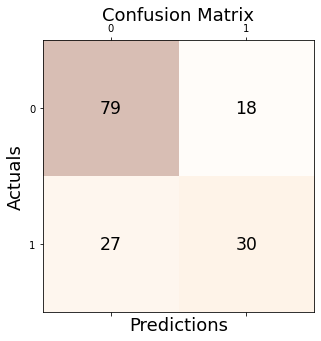

Precision: 0.701
Recall: 0.708
Accuracy: 0.708
F1 Score: 0.702


In [17]:
# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_preds)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, y_pred=y_preds, average='weighted', labels=np.unique(y_preds)))
print('Recall: %.3f' % recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds)))
print('Accuracy: %.3f' % accuracy_score(y_test, y_preds))
print('F1 Score: %.3f' % f1_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds)))

# Implementing Logistc Regression using Relu as Activation Function

ReLu is a non-linear activation function that is used in multi-layer neural networks or deep neural networks.eLu function has been used instead to calculate the activation values in traditional neural network or deep neural network paradigms.The ReLu function is able to accelerate the training speed of deep neural networks compared to traditional activation functions since the derivative of ReLu is 1 for a positive input. Due to a constant, deep neural networks do not need to take additional time for computing error terms during training phase.
>
Also ReLu function does not trigger the vanishing gradient problem when the number of layers grows. This is because this function does not have an asymptotic upper and lower bound. Thus, the earliest layer (the first hidden layer) is able to receive the errors coming from the last layers to adjust all weights between layers. 
>
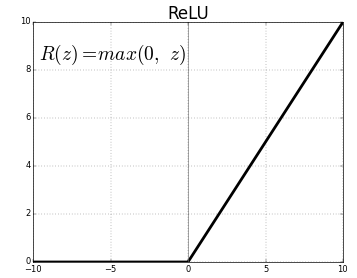

In [18]:
def relu(x):
    return max(0.0, np.all(x))

In [19]:
# Gradient Descent Function
def gradientdescentrelu(X, y, lmd, alpha, num_iter, print_cost):

    # select initial values zero
    theta = np.zeros(X.shape[1])
    
    costs = []  
    
    for i in range(num_iter):
        z = np.dot(X, theta)
        h = relu(z)
        
        # adding regularization 
        reg = lmd / y.size * theta
        # first theta is intercept
        # it is not regularized
        reg[0] = 0
        cost = J(h, y)
        
        gradient = np.dot(X.T, (h - y)) / y.size + reg
        theta = theta - alpha * gradient
    
        if print_cost and i % 100 == 0: 
            print('Number of Iterations: ', i, 'Cost : ', cost, 'Theta: ', theta)
        if i % 100 == 0:
            costs.append(cost)
      
    return theta, costs

In [20]:
# Predict Function 
def predict_relu(X_test, theta):
    z = np.dot(X_test, theta)
    return relu(z)

In [21]:
# Main Logistic Function
def logistic_relu(X_train, y_train, X_test, lmd=0, alpha=0.1, num_iter=30000, print_cost = False):
    # Adding intercept
    intercept = np.ones((X_train.shape[0], 1))
    X_train = np.concatenate((intercept, X_train), axis=1)
    
    intercept = np.ones((X_test.shape[0], 1))
    X_test = np.concatenate((intercept, X_test), axis=1)

    # one vs rest
    u=set(y_train)
    t=[]
    allCosts=[]   
    for c in u:
        # set the labels to 0 and 1
        ynew = np.array(y_train == c, dtype = int)
        theta_onevsrest, costs_onevsrest = gradientdescent(X_train, ynew, lmd, alpha, num_iter, print_cost)
        t.append(theta_onevsrest)
        
        # Save costs
        allCosts.append(costs_onevsrest)
        
    # Calculate probabilties
    pred_test = np.zeros((len(u),len(X_test)))
    for i in range(len(u)):
        pred_test[i,:] = predict_relu(X_test,t[i])
    
    # Select max probability
    prediction_test = np.argmax(pred_test, axis=0)
    
    # Calculate probabilties
    pred_train = np.zeros((len(u),len(X_train)))
    for i in range(len(u)):
        pred_train[i,:] = predict_relu(X_train,t[i])
    
    # Select max probability
    prediction_train = np.argmax(pred_train, axis=0)
    
    d = {"costs": allCosts,
         "Y_prediction_test": prediction_test, 
         "Y_prediction_train" : prediction_train, 
         "learning_rate" : alpha,
         "num_iterations": num_iter,
         "lambda": lmd}
        
    return d

In [22]:
result_relu = logistic_relu(X_train, y_train, X_test)

In [23]:
y_predr = result_relu['Y_prediction_test']

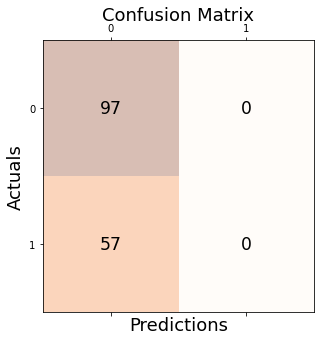

Precision: 0.630
Recall: 1.000
Accuracy: 0.630
F1 Score: 0.773


In [24]:
# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predr)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, y_pred=y_predr, average='weighted', labels=np.unique(y_predr)))
print('Recall: %.3f' % recall_score(y_test, y_predr, average='weighted', labels=np.unique(y_predr)))
print('Accuracy: %.3f' % accuracy_score(y_test, y_predr))
print('F1 Score: %.3f' % f1_score(y_test, y_predr, average='weighted', labels=np.unique(y_predr)))

# Implementing Stochastic Gradient Descent with Log Loss Function

The word ‘stochastic‘ means a system or process linked with a random probability. Hence, in Stochastic Gradient Descent, a few samples are selected randomly instead of the whole data set for each iteration. In Gradient Descent, there is a term called “batch” which denotes the total number of samples from a dataset that is used for calculating the gradient for each iteration. In typical Gradient Descent optimization, like Batch Gradient Descent, the batch is taken to be the whole dataset.In SGD, it uses only a single sample, i.e., a batch size of one, to perform each iteration. The sample is randomly shuffled and selected for performing the iteration.

In [25]:
def sgd_regressor(X, y, learning_rate=0.2, n_epochs=100, k=40):
    
    w = np.random.randn(1,8)  # Randomly initializing weights
    b = np.random.randn(1,1)   # Random intercept value
    
    epoch=1
    
    while epoch <= n_epochs:
        
        temp = X.sample(k)

        X_tr = temp.iloc[:,0:8].values
        y_tr = temp.iloc[:,-1].values
        
        Lw = w
        Lb = b
        
        loss = 0
        y_pred = []
        sq_loss = []
        
        for i in range(k):
            
            Lw = (-2/k * X_tr[i]) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            Lb = (-2/k) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            
            w = w - learning_rate * Lw
            b = b - learning_rate * Lb
            
            y_predicted = np.dot(X_tr[i],w.T)
            y_pred.append(y_predicted)
        loss = mean_squared_error(y_pred, y_tr)
        
        print("Epoch: %d, Loss: %.3f" %(epoch, loss))
        epoch+=1
        learning_rate = learning_rate/1.02
        
    return w,b

In [26]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        temp_ = x
        X_test = temp_.iloc[:,0:8].values
        y = (np.dot(w,X_test[i])+b).item()
        
        y_pred.append(y)
    return np.array(y_pred)

w,b = sgd_regressor(X_train,y_train)
y_pred_customsgd = predict(X_test,w,b)

Epoch: 1, Loss: 3.400
Epoch: 2, Loss: 2.313
Epoch: 3, Loss: 1.687
Epoch: 4, Loss: 0.986
Epoch: 5, Loss: 0.741
Epoch: 6, Loss: 0.757
Epoch: 7, Loss: 0.548
Epoch: 8, Loss: 0.298
Epoch: 9, Loss: 0.279
Epoch: 10, Loss: 0.165
Epoch: 11, Loss: 0.168
Epoch: 12, Loss: 0.088
Epoch: 13, Loss: 0.120
Epoch: 14, Loss: 0.073
Epoch: 15, Loss: 0.071
Epoch: 16, Loss: 0.067
Epoch: 17, Loss: 0.035
Epoch: 18, Loss: 0.048
Epoch: 19, Loss: 0.027
Epoch: 20, Loss: 0.015
Epoch: 21, Loss: 0.020
Epoch: 22, Loss: 0.023
Epoch: 23, Loss: 0.010
Epoch: 24, Loss: 0.006
Epoch: 25, Loss: 0.006
Epoch: 26, Loss: 0.006
Epoch: 27, Loss: 0.006
Epoch: 28, Loss: 0.002
Epoch: 29, Loss: 0.003
Epoch: 30, Loss: 0.003
Epoch: 31, Loss: 0.003
Epoch: 32, Loss: 0.001
Epoch: 33, Loss: 0.002
Epoch: 34, Loss: 0.001
Epoch: 35, Loss: 0.001
Epoch: 36, Loss: 0.001
Epoch: 37, Loss: 0.001
Epoch: 38, Loss: 0.001
Epoch: 39, Loss: 0.001
Epoch: 40, Loss: 0.001
Epoch: 41, Loss: 0.001
Epoch: 42, Loss: 0.000
Epoch: 43, Loss: 0.000
Epoch: 44, Loss: 0.0

In [27]:
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))

Mean Squared Error : 1.1619064855085761


# Ridge Regularization (L2)

This technique performs L2 regularization. The main algorithm behind this is to adding the penalty which is equivalent to the square of the magnitude of coefficients. However, it is considered to be a technique used when the info suffers from multicollinearity (independent variables are highly correlated). In multicollinearity, albeit the smallest amount squares estimates (OLS) are unbiased, their variances are large which deviates the observed value faraway from truth value. By adding a degree of bias to the regression estimates, ridge regularization reduces the quality errors. It tends to solve the multicollinearity problem through shrinkage parameter λ.

In [28]:
# Ridge Regularization
  
class RidgeRegularization() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b

R squared error :  0.18640325887328224
Mean Absolute Error :  0.3660834746081748
Predicted values
------------------
 68    -0.05
395    0.47
699    0.53
dtype: float64
Real values
------------------
 68     0
395    0
699    0
Name: Outcome, dtype: int64
Trained W         0.07
Trained b         0.35


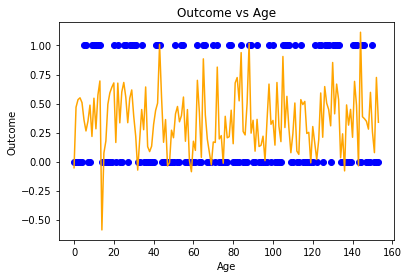

In [29]:
# Model training    
model = RidgeRegularization( iterations = 1000,                             
                        learning_rate = 0.01, l2_penality = 1 )
model.fit( X_train, y_train )
# Prediction on test set
Y_pred = model.predict( X_test )    

# R squared error
score_1 = metrics.r2_score(y_test, Y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, Y_pred)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print( "Predicted values\n------------------\n", np.round( Y_pred[:3], 2 ) )     
print( "Real values\n------------------\n", y_test[:3] )    
print( "Trained W        ", round( model.W[0], 2 ) )    
print( "Trained b        ", round( model.b, 2 ) )


# Visualization on test set    
x_test=np.arange(0,len(X_test),1)
plt.scatter( x_test, y_test, color = 'blue' )    
plt.plot( x_test, Y_pred, color = 'orange' )    
plt.title( 'Outcome vs Age' )    
plt.xlabel( 'Age' )    
plt.ylabel( 'Outcome' )    
plt.show()

# Lasso Regularization (L1)

This is a regularization technique used in feature selection using a Shrinkage method also referred to as the penalized regression method. Lasso is short for Least Absolute Shrinkage and Selection Operator, which is used both for regularization and model selection. If a model uses the L1 regularization technique, then it is called lasso regression.

In [30]:
# Lasso Regularization
  
class LassoRegularization() :
      
    def __init__( self, learning_rate, iterations, l1_penality ) :  
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1_penality = l1_penality
          
    # Function for model training
              
    def fit( self, X, Y ) : 
        # no_of_training_examples, no_of_features 
        self.m, self.n = X.shape
        
        # weight initialization  
        self.W = np.zeros( self.n ) 
        self.b = 0
        self.X = X 
        self.Y = Y
          
        # gradient descent learning
        for i in range( self.iterations ) :
            self.update_weights()
        return self
      
    # Helper function to update weights in gradient descent  
    def update_weights( self ) :
        Y_pred = self.predict( self.X )
   
        # calculate gradients    
        dW = np.zeros( self.n )
        for j in range( self.n ) :
            if self.W[j] > 0 : 
                dW[j] = ( - ( 2 * ( self.X.iloc[:, j] ).dot( self.Y - Y_pred ) )           
                         + self.l1_penality ) / self.m
            else :  
                dW[j] = ( - ( 2 * ( self.X.iloc[:, j] ).dot( self.Y - Y_pred ) )         
                         - self.l1_penality ) / self.m

        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :
        return X.dot( self.W ) + self.b

R squared error :  0.012233749278786066
Mean Absolute Error :  0.4556877957168242
Predicted values
------------------
 68     0.33
395    0.33
699    0.35
dtype: float64
Real values
------------------
 68     0
395    0
699    0
Name: Outcome, dtype: int64
Trained W         0.0
Trained b         0.34


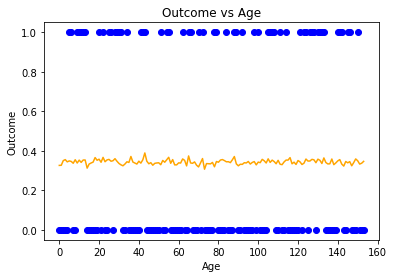

In [31]:
# Model training
      
model = LassoRegularization( iterations = 1000, learning_rate = 0.01, l1_penality = 500 )
model.fit( X_train, y_train )

# Prediction on test set
Y_pred = model.predict( X_test )

# R squared error
score_1 = metrics.r2_score(y_test, Y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, Y_pred)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print( "Predicted values\n------------------\n", np.round( Y_pred[:3], 2 ) ) 
print( "Real values\n------------------\n", y_test[:3] )
print( "Trained W        ", round( model.W[0], 2 ) )
print( "Trained b        ", round( model.b, 2 ) )

# Visualization on test set 
plt.scatter( x_test, y_test, color = 'blue' )
plt.plot( x_test, Y_pred, color = 'orange' )
plt.title( 'Outcome vs Age' )
plt.xlabel( 'Age' )
plt.ylabel( 'Outcome' )
plt.show()

#Conclusion

For this given dataset Sigmoid activation performed better than ReLU activation function. Sigmoid gives better results as It gives smooth gradient, thereby, preventing jumps in output values. Also,it's one of the best Normalized functions out there.With 1 and 0, it makes a clear prediction.
Another advantage of this function is that when used with (- infinite, + infinite) as in the linear function, it returns a value in the range of (0,1)As a result, the activation value does not disappear.
>
ReLU gave less accuracy as the limitations of ReLU is the case where large weight updates can mean that the summed input to the activation function is always negative, regardless of the input to the network. This means that a node with this problem will forever output an activation value of 0.0. 

#References

https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

https://www.kaggle.com/code/burhanykiyakoglu/k-nn-logistic-regression-k-fold-cv-from-scratch/notebook
    
https://towardsdatascience.com/implementing-sgd-from-scratch-d425db18a72c

https://researchdatapod.com/how-to-solve-python-valueerror-operands-could-not-be-broadcast-together-with-shapes/

https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/

https://www.geeksforgeeks.org/implementation-of-ridge-regression-from-scratch-using-python/

https://www.geeksforgeeks.org/implementation-of-lasso-regression-from-scratch-using-python/